<a href="https://colab.research.google.com/github/salehghulamqasim/Test-HackahtonJeddah/blob/main/yolov8_plasticBottles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Feb  2 18:25:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

#Below i imported dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
'''
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(1).download("yolov8")
'''
# plastic-bottles-dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zRJIpymKcbxk5LQCEXDH")
project = rf.workspace("2-anyml").project("plastic-bottles-dataset-x2kqx")
dataset = project.version(1).download("yolov8")

#here i cloned the dataset of github repo
#!git clone https://github.com/m0-n/Plastic-Bottles-Dataset

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 9.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4e2d2dccc6da992d82e371cc84eb77b665a15461e8ca330472cdd2dfeb9129f1
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to plastic-bottles-dataset-1 in yolov8:: 100%|██████████| 3268/3268 [00:04<00:00, 769.82it/s] 


# Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=2 plots=True

/content
100% 83.7M/83.7M [00:02<00:00, 34.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/plastic-bottles-dataset-1/data.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

# predict and testing

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1675362727.2404df509040.2241.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


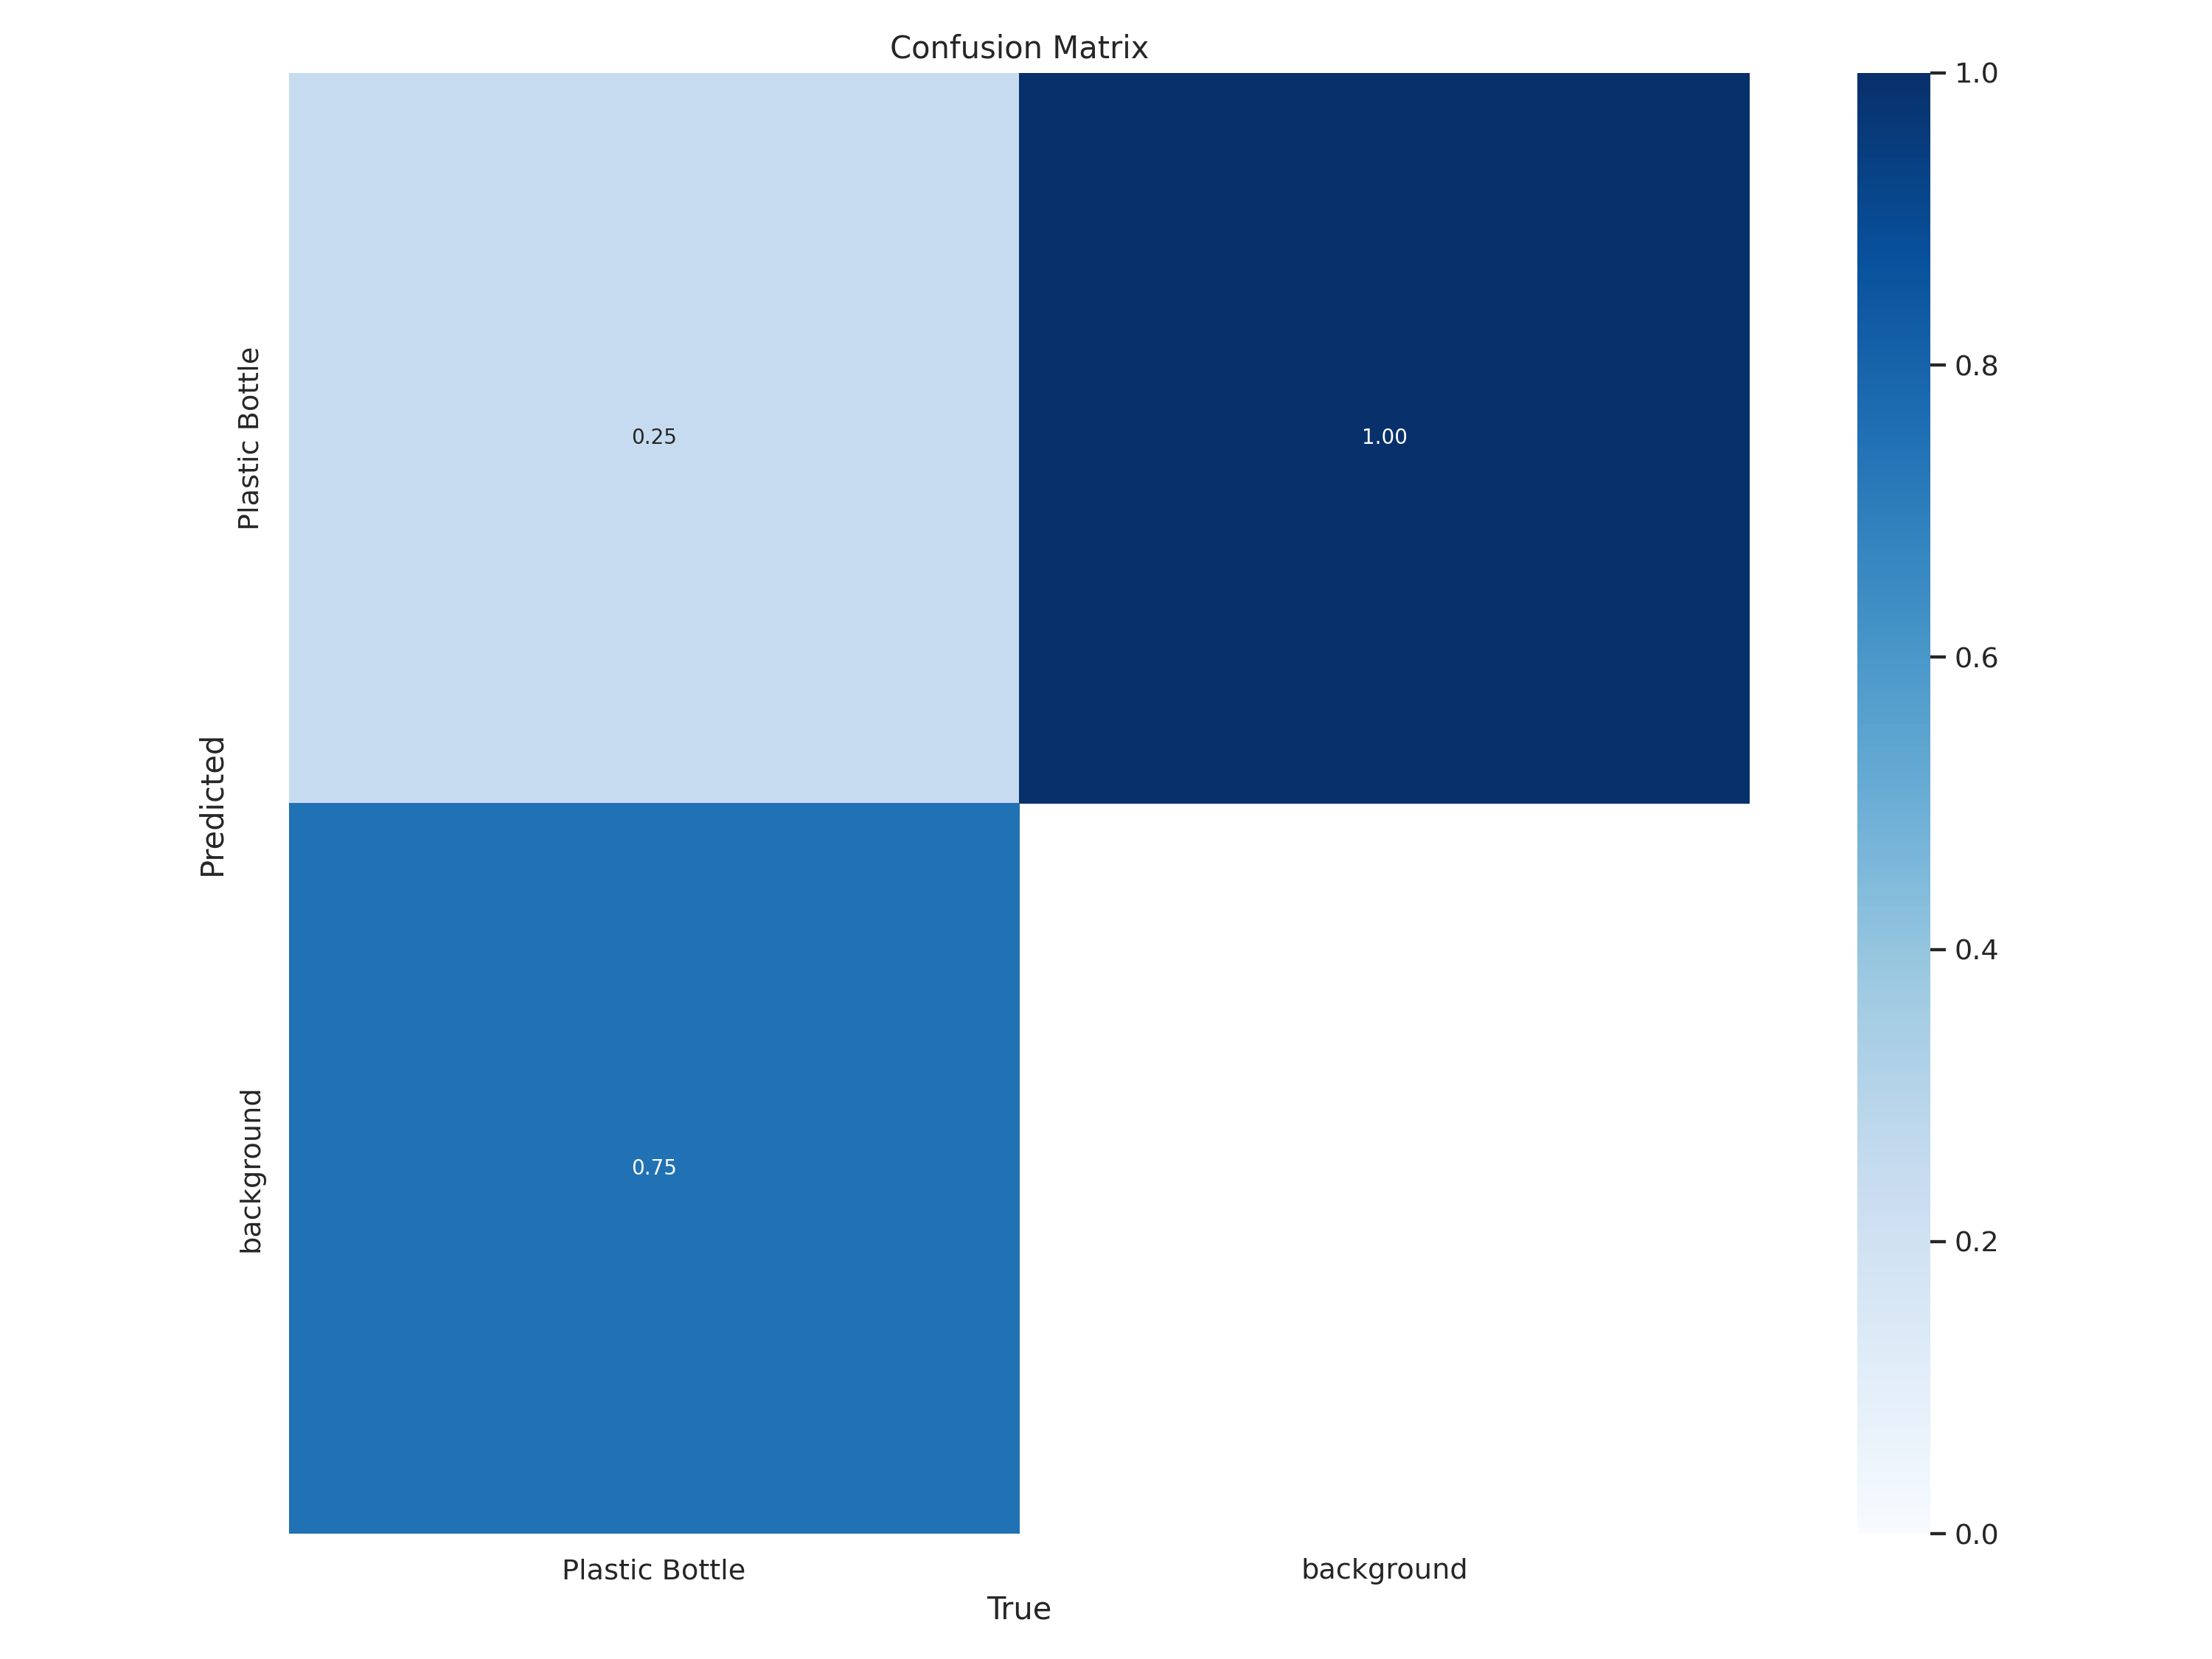

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


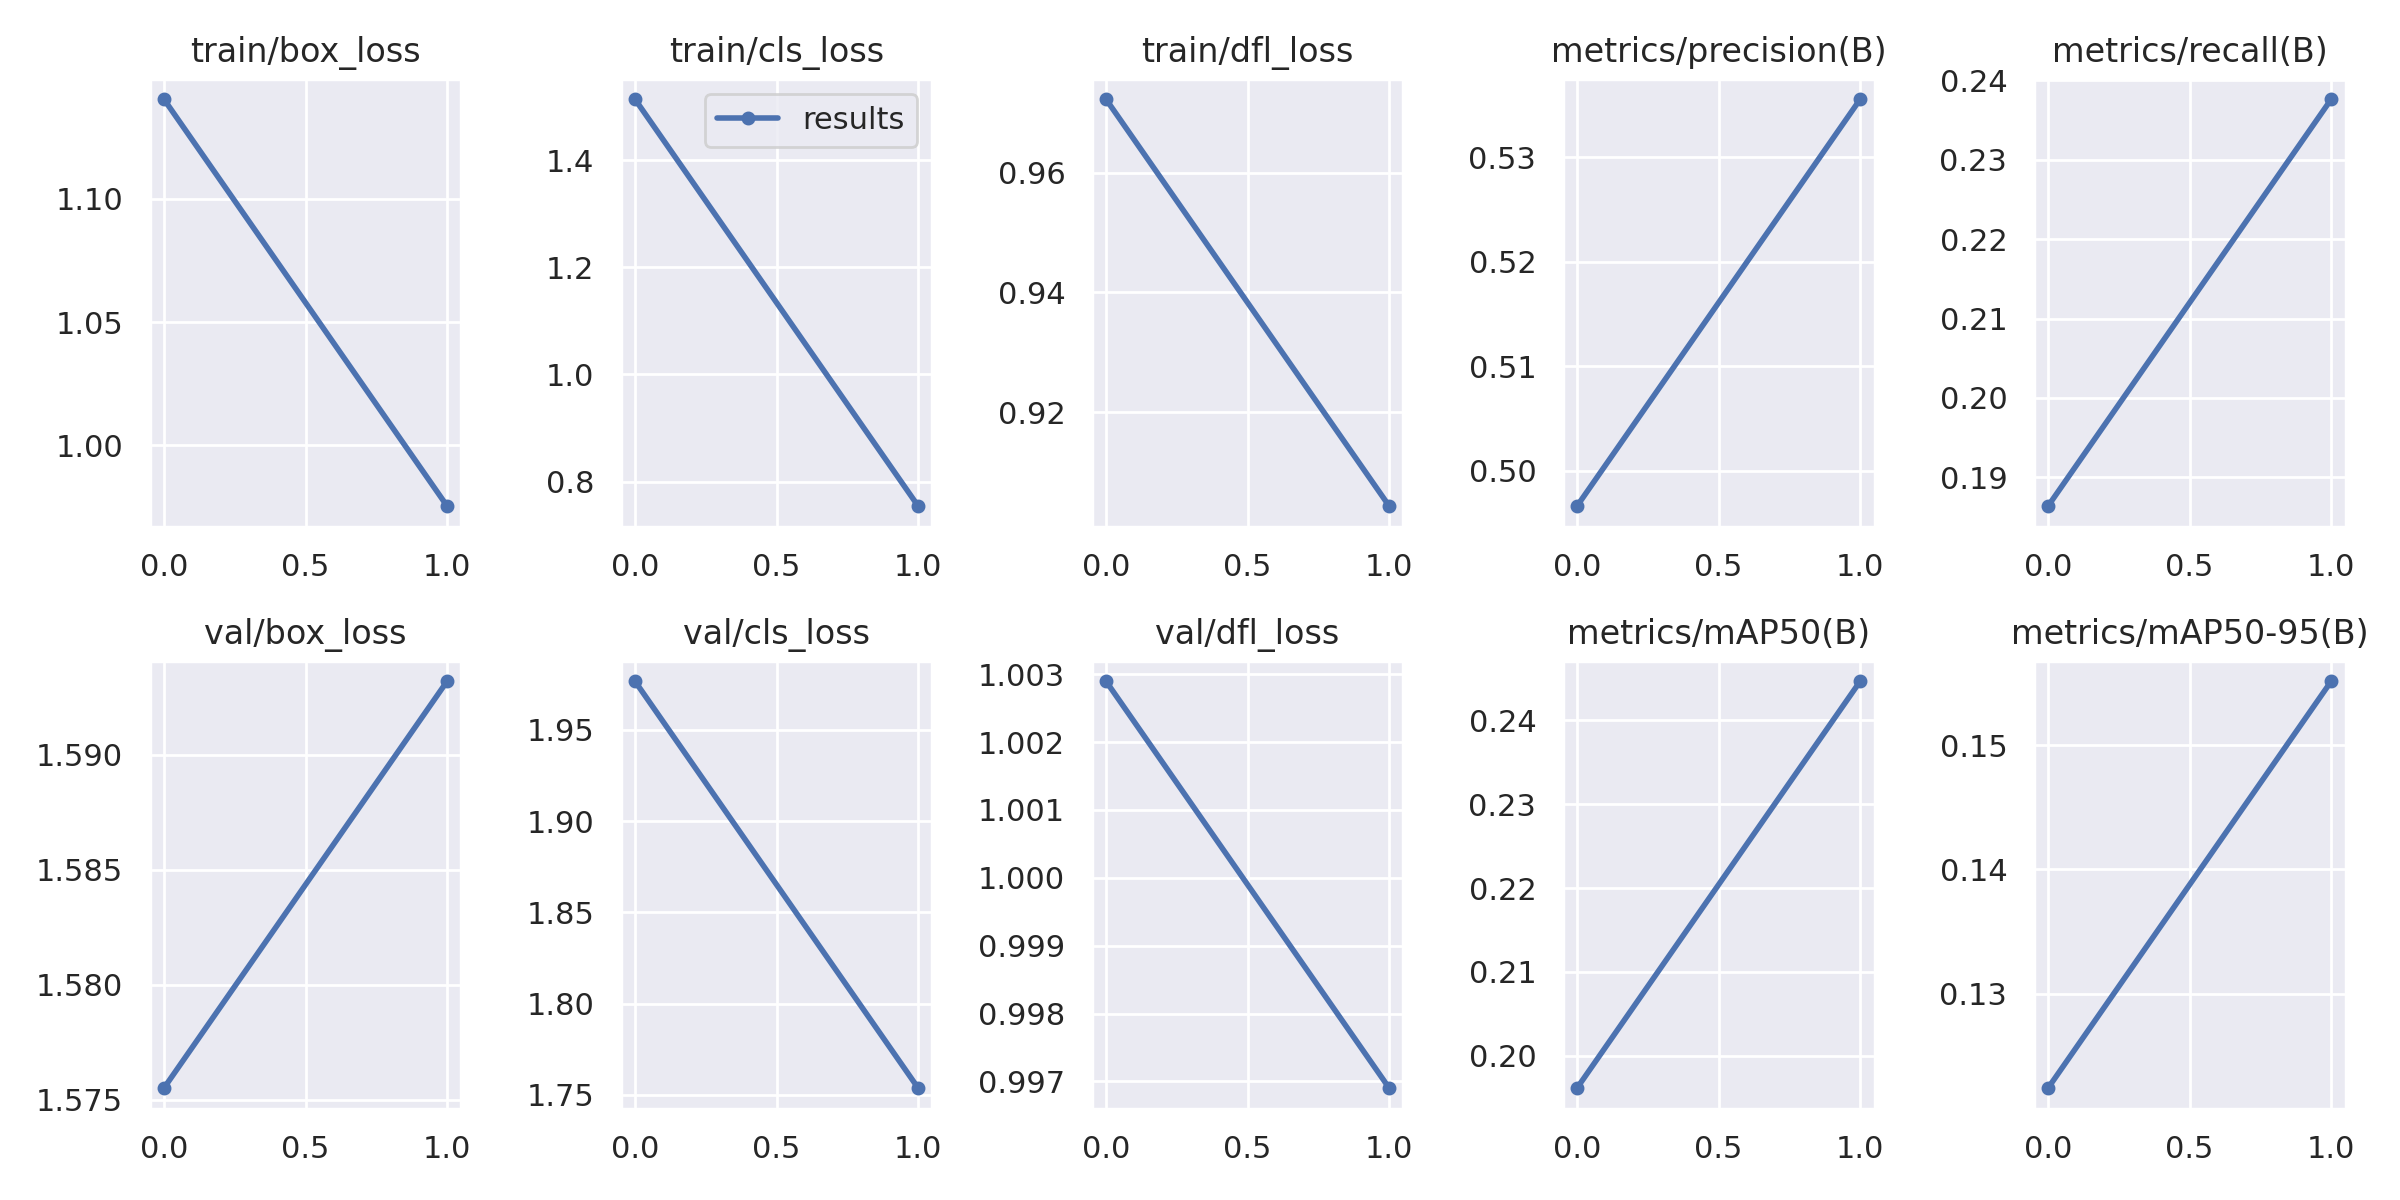

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


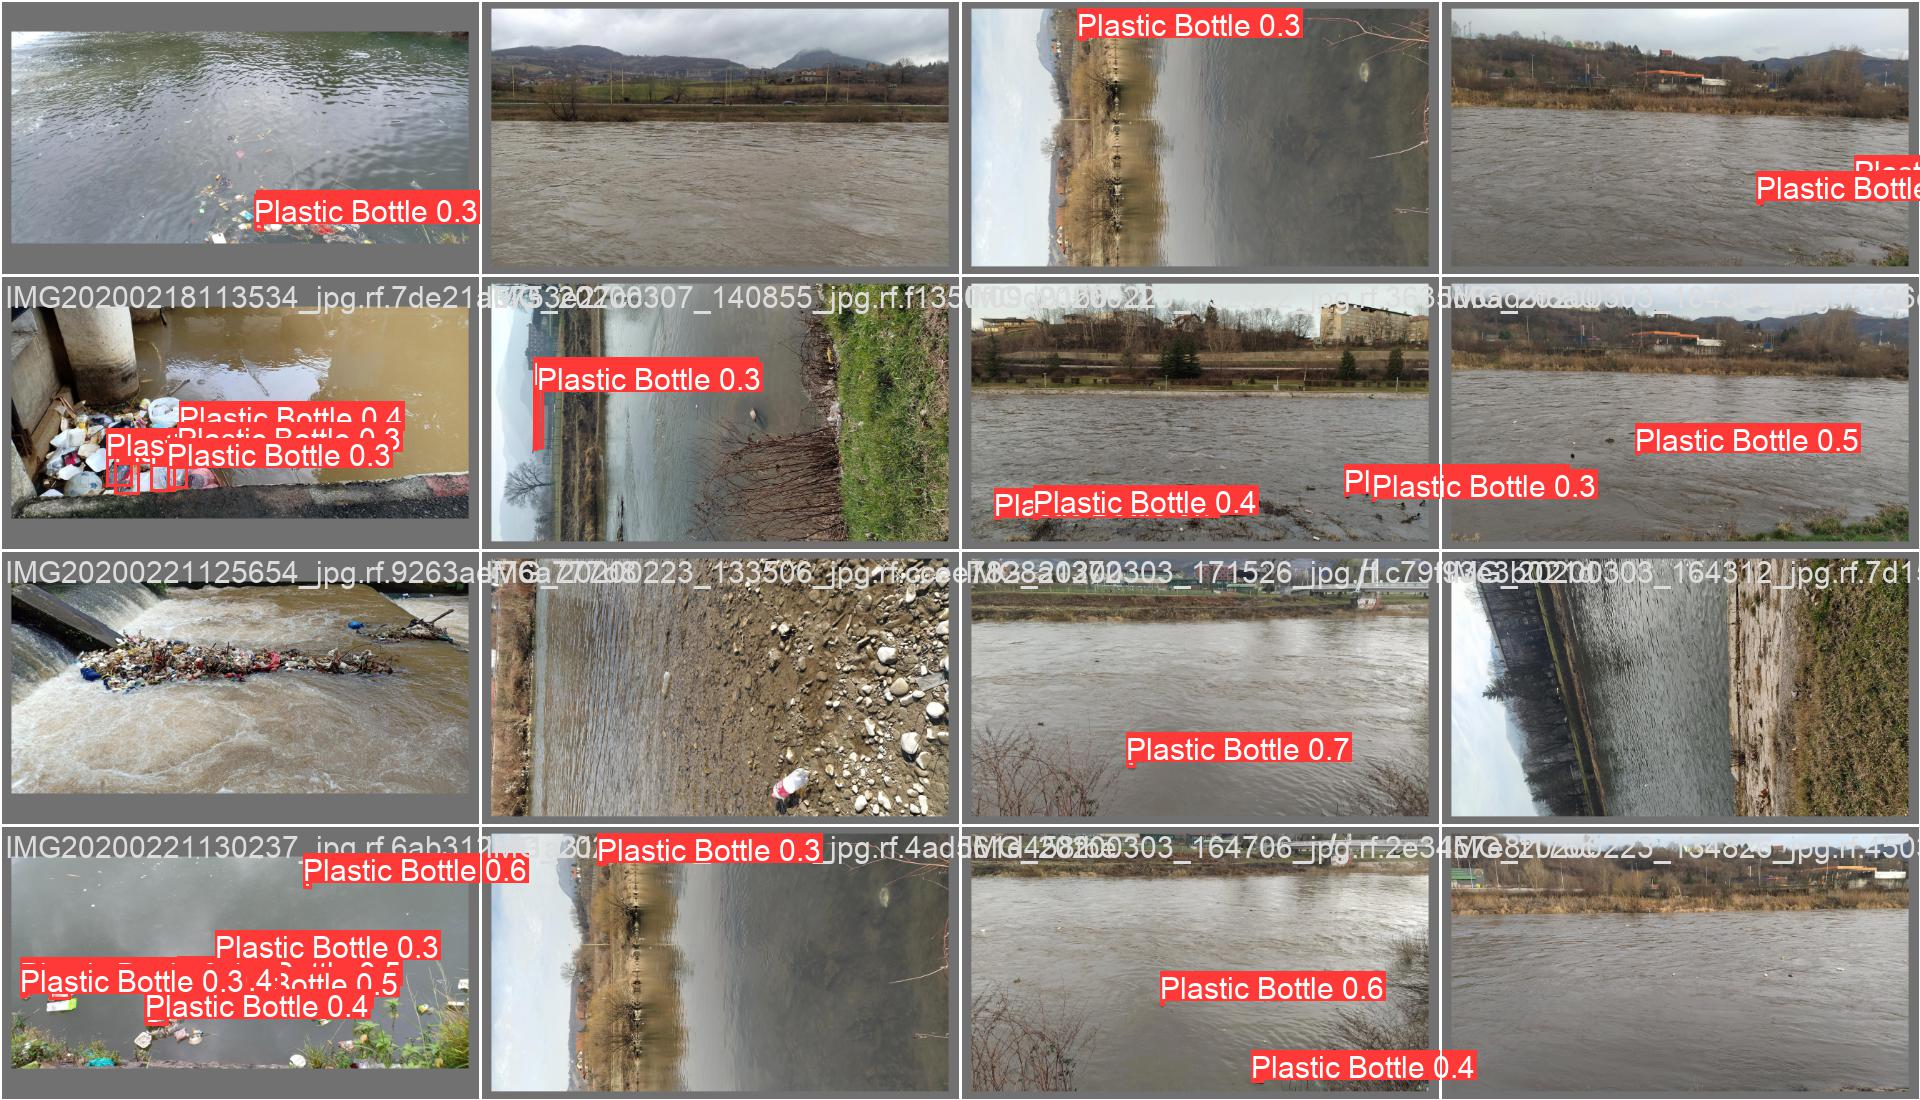

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/plastic-bottles-dataset-1/valid/labels.cache... 252 images, 1 backgrounds, 0 corrupt: 100% 252/252 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:15<00:00,  1.02it/s]
                   all        252       1320      0.537      0.239      0.243      0.156
Speed: 0.5ms pre-process, 26.0ms inference, 0.0ms loss, 1.7ms post-process per image


## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/video.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.8ms
video 1/1 (2/220) /content/video.mp4: 352x640 12 Plastic Bottles, 41.1ms
video 1/1 (3/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.1ms
video 1/1 (4/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.1ms
video 1/1 (5/220) /content/video.mp4: 352x640 11 Plastic Bottles, 41.1ms
video 1/1 (6/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.1ms
video 1/1 (7/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.1ms
video 1/1 (8/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.2ms
video 1/1 (9/220) /content/video.mp4: 352x640 11 Plastic Bottles, 41.2ms
video 1/1 (10/220) /content/video.mp4: 352x640 11 Plastic Bottles, 41.1ms
video 1/1 (11/220) /content/video.mp4: 352x640 10 Plastic Bottles, 41.1ms
video 1/1 (12/220

**NOTE:** Let's take a look at few results.

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:7]:
      display(Image(filename=image_path, width=600))
      print("\n")

#What did we do above?



1.   First we loaded packages and yolov8
2.   Then we imported our dataset via Roboflow
3.   After that we trained our model with yolov8l for better accuracy.
4.   Then we checked its accuracy with the help of charts and diagrams
5.   After that we predicted with help of a short video just to see how well it detects objects
6.   Finally we saved the file best.pt along with results :)

